In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import pickle as pkl

curdir=os.getcwd()
os.environ['GC_DM_BASE']=os.path.dirname(curdir)
os.environ['GC_DM_DATA']='/data/user/tchau/DarkMatter_OscNext/'

sys.path.append("../Utils/")
sys.path.append("../Spectra/")
sys.path.append("../PDFs/")
from Signal import *
from Background import *
from Plot_Histogram import *
import matplotlib.pyplot as plt
#Change the resolution of the plots
plt.rcParams['figure.dpi']= 150

# <font color="darkmagenta"> PDFs computation </font>

In [13]:
# channel and mass
channel = "WW"
mass = 8000
profile='NFW'
process='decay'

if process=='ann': Etrue_max = mass
if process=='decay': Etrue_max = mass/2.

# Bin scheme
if Etrue_max < 3000:
    Bin = Std_Binning(Etrue_max)
else:
    # OscNext only select events up to ~ 3TeV
    Bin = Std_Binning(3000)
    
Reco = RecoRate(channel, 
            mass,
            profile,
            Bin,
            set='1122',
            spectra='Charon',
            process=process
            )
        

In [14]:
RecoHist = Reco.ComputeRecoRate()

********************
Buiding final reco rate using Resp method
********************
Computing Response Matrix
********************
Accessing MC set 1122
********************
Computing true rate with Charon spectra
channel: WW || mass: 8000 || profile: NFW || process: decay

********************
Computing Spectra
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
********************
Computing Jfactor with default option: precomputed Clumpy file


In [15]:
ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}


/tmp/ipykernel_24065/2082960166.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Reco.hist['TrueRate']['nu_mu']* 1e-23, np.array([Reco.bin['true_psi_edges'], Reco.bin['true_energy_edges']]),


(<AxesSubplot:xlabel='$\\psi_{true}$', ylabel='$E_{true}$'>,
 <AxesSubplot:>,
 <AxesSubplot:>)

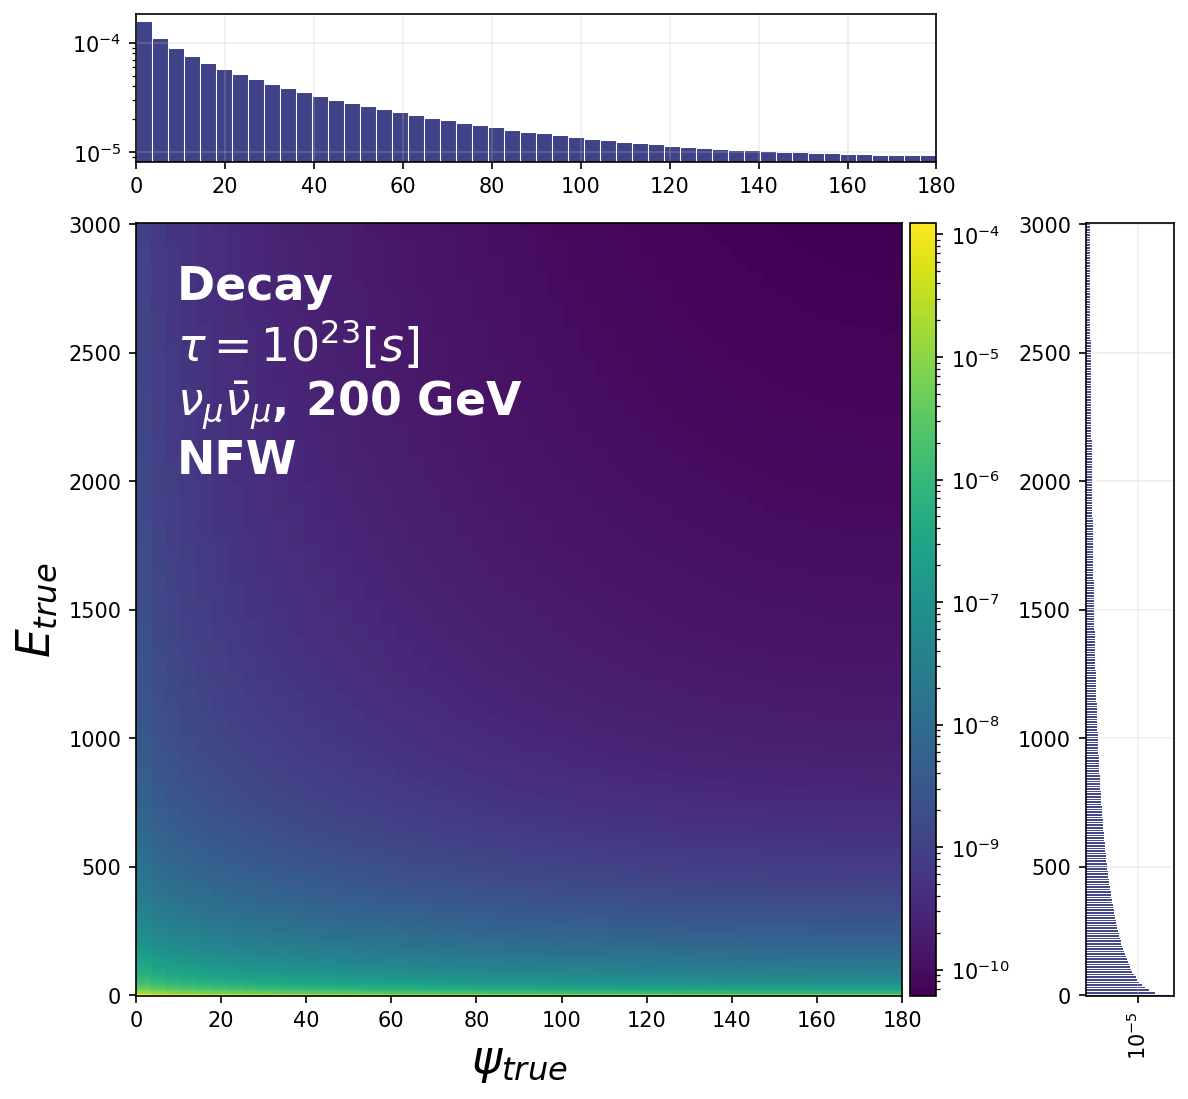

In [16]:
# True flux
plot_projections(Reco.hist['TrueRate']['nu_mu']* 1e-23, np.array([Reco.bin['true_psi_edges'], Reco.bin['true_energy_edges']]), 
                 r"$\psi_{true}$", r"$E_{true}$", "Decay \n"+r"$\tau = 10^{23} [s]$" "\n" r"$\nu_\mu \bar{\nu}_\mu$, 200 GeV" "\n" "NFW", zlabel='',zlogscale=True)



/tmp/ipykernel_24065/1921891046.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", f"{profile}\n"+ ch_title[channel] +"- {} GeV".format(mass))


(<AxesSubplot:xlabel='$\\psi_{reco}$', ylabel='$log_{10}(E_{reco})$'>,
 <AxesSubplot:>,
 <AxesSubplot:>)

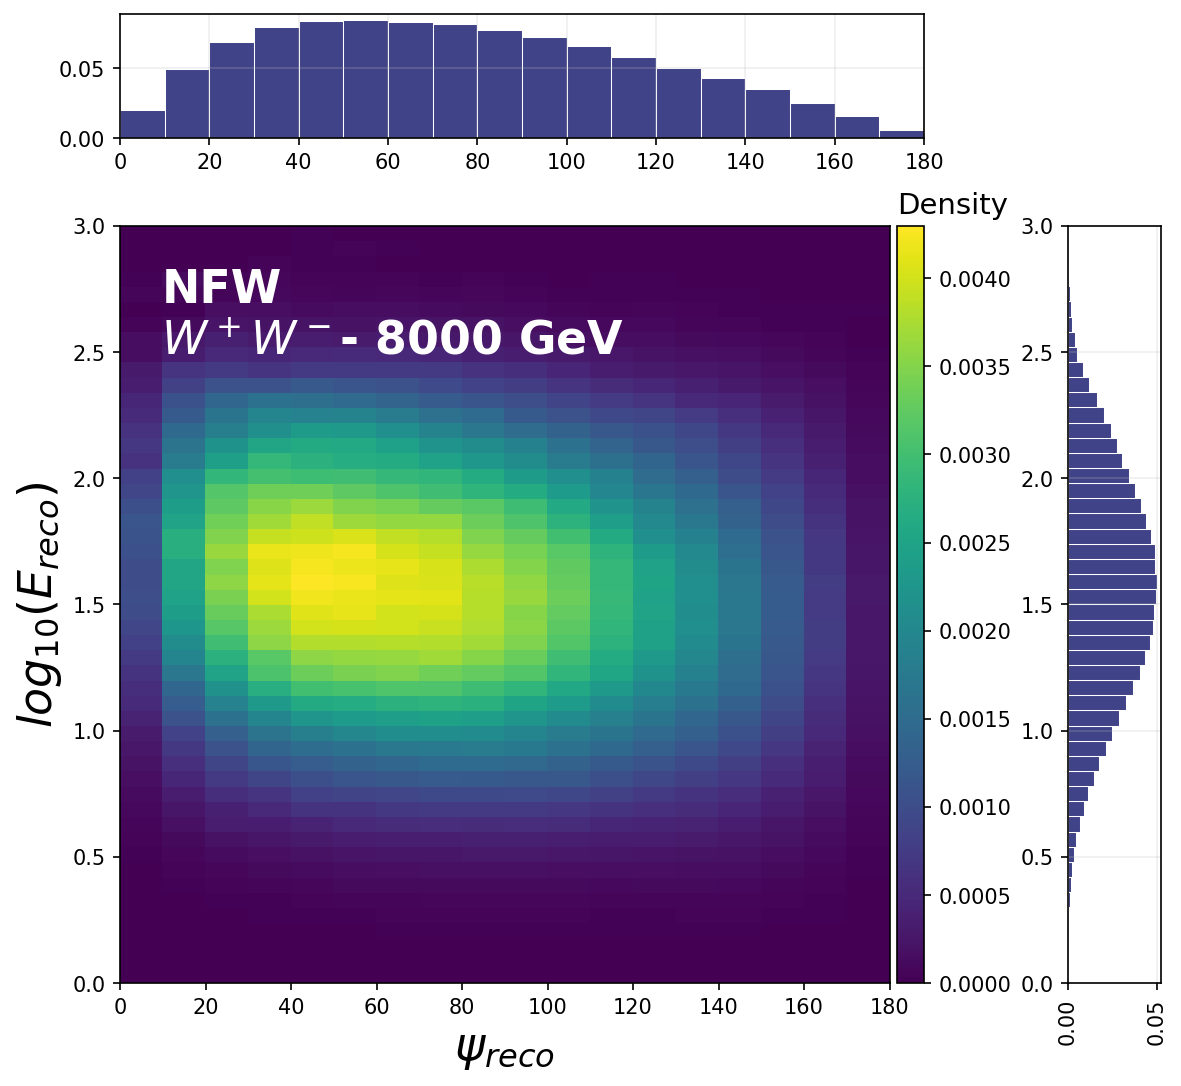

In [17]:
# Reconstruction PDF
plot_projections(RecoHist/np.sum(RecoHist), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", f"{profile}\n"+ ch_title[channel] +"- {} GeV".format(mass))


Loading /data/user/tchau/DarkMatter_OscNext//Sample/Burnsample/
apply reflection at psi=0
bandwidth: 0.024513413235813398


/tmp/ipykernel_5200/738632387.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "RA Scrambled Bkg".format(mass))


(<AxesSubplot:xlabel='$\\psi_{reco}$', ylabel='$log_{10}(E_{reco})$'>,
 <AxesSubplot:>,
 <AxesSubplot:>)

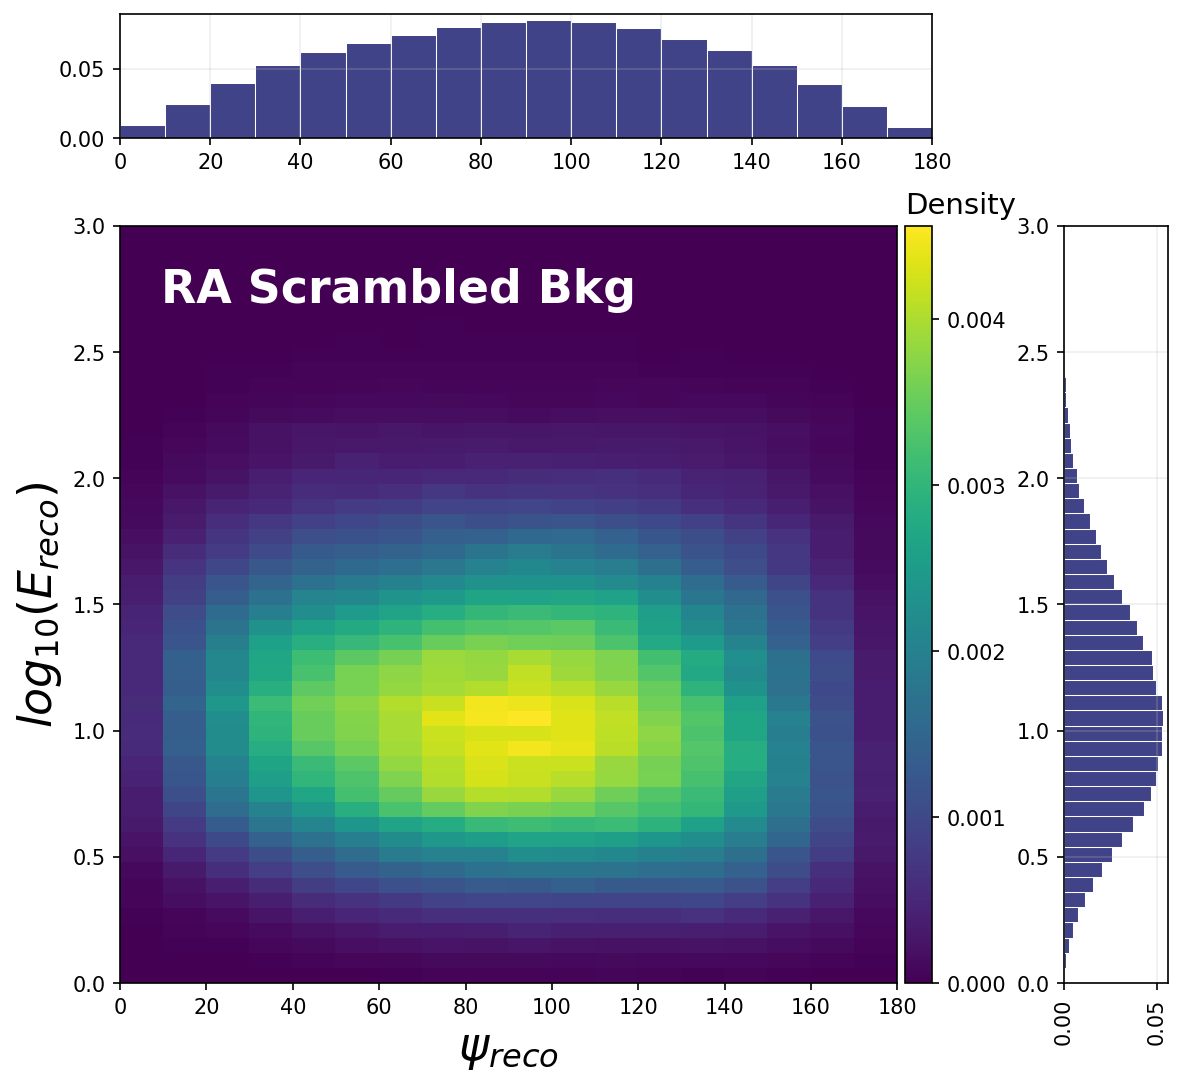

In [20]:
# Background as Scramble data
Bkg_bwISJ = ScrambleBkg(Bin, bandwidth="ISJ", oversample=10)
plot_projections(Bkg_bwISJ/np.sum(Bkg_bwISJ), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "RA Scrambled Bkg".format(mass))

In [21]:
# Scrambled Signal PDF
channel = "WW"
mass = 8000
profile='NFW'
# Bin
Bin = Std_Binning(3000, N_Etrue=300)
Reco_Scr = RecoRate(channel, 
            mass, 
            profile, 
            Bin,
            Scramble=True)
Rate_Scr = Reco_Scr.ComputeRecoRate()

********************
Buiding final reco rate using Resp method
********************
Computing Response Matrix
********************
Accessing MC set 1122
********************
Computing true rate with Charon spectra
channel: WW || mass: 8000 || profile: NFW || process: ann

********************
Computing Spectra
Initial Flux Loading: /home/tchau/.local/lib/python3.10/site-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
********************
Computing Jfactor with default option: precomputed Clumpy file


/tmp/ipykernel_10384/2468401571.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal  \n" +  ch_title[channel] +"- {} GeV".format(mass))


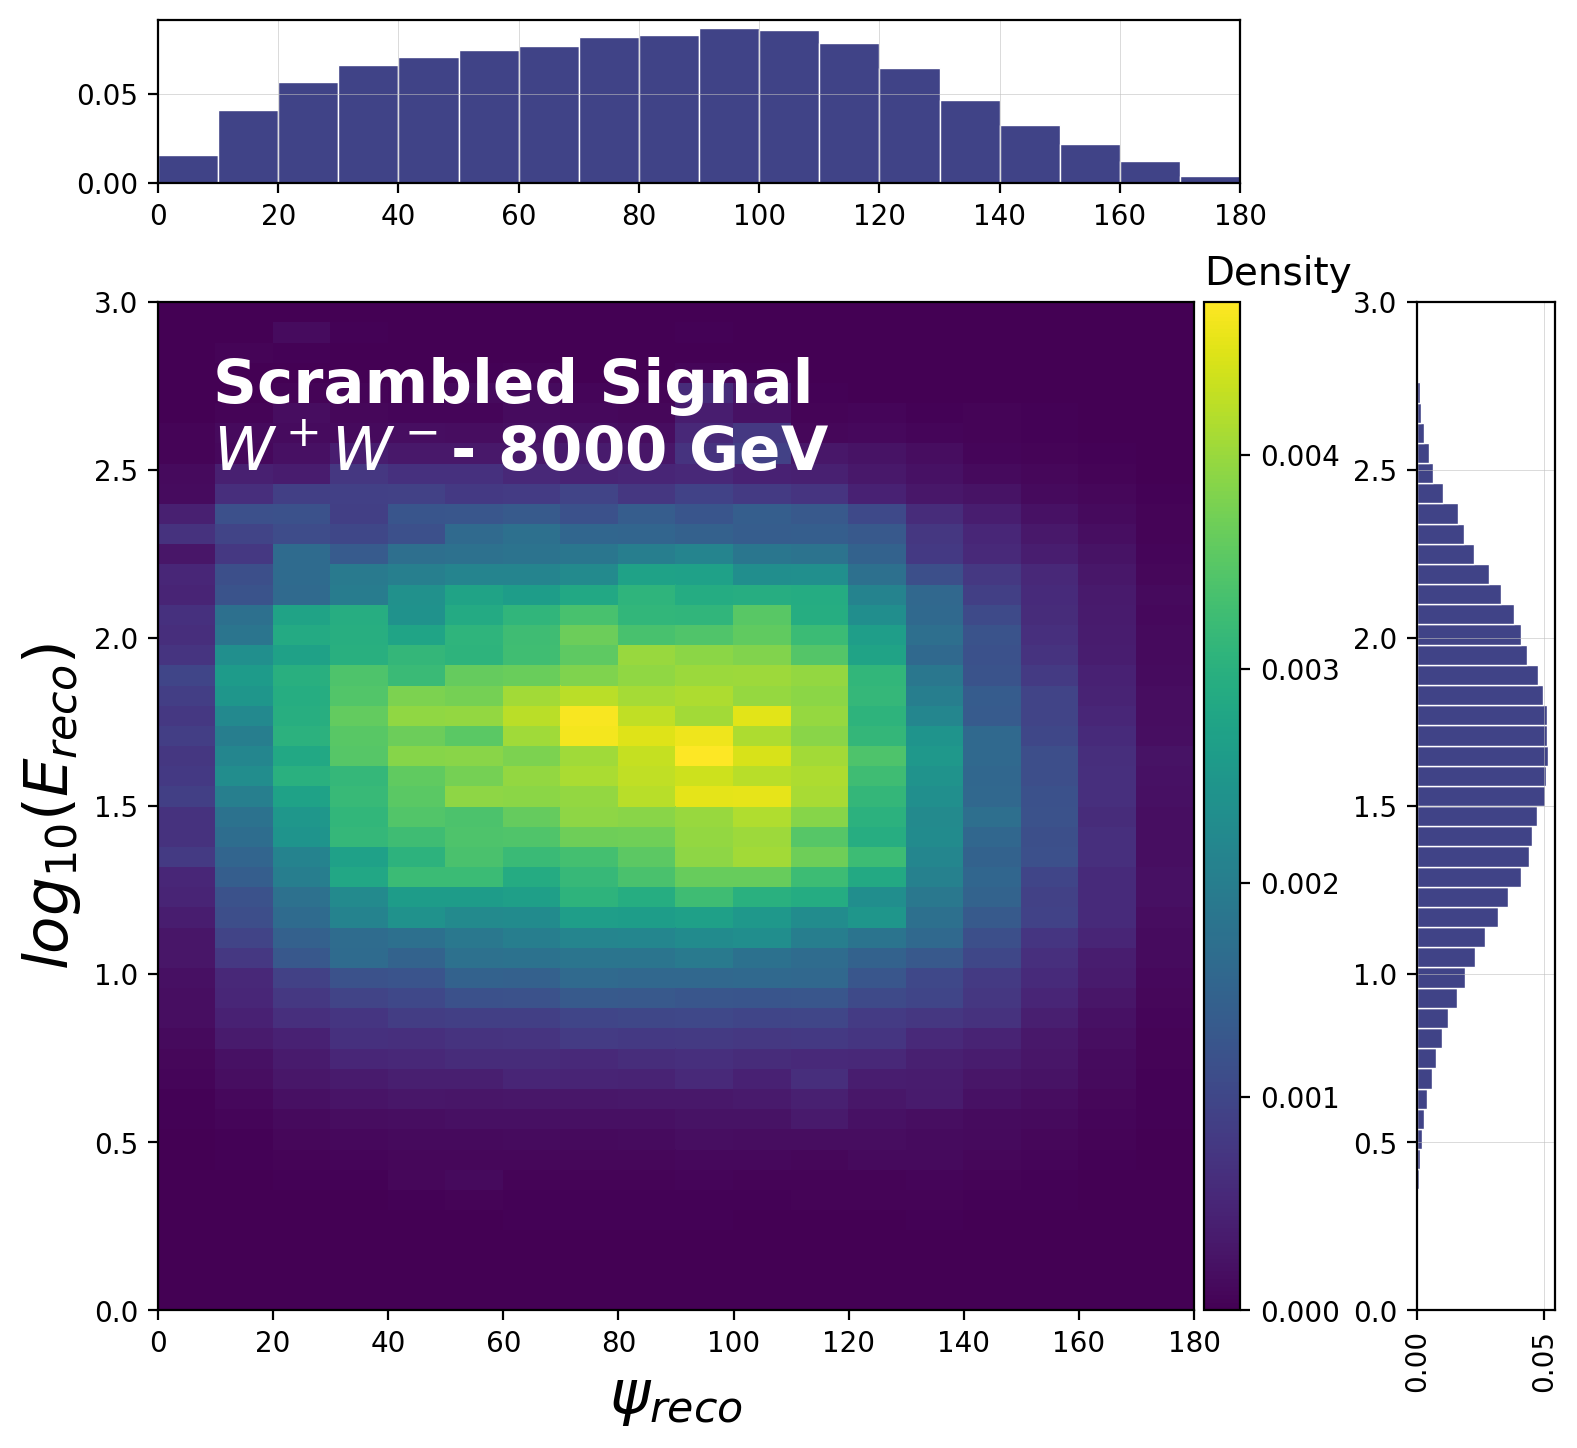

In [24]:
plot_projections(Rate_Scr/np.sum(Rate_Scr), np.array([Bin['reco_psi_edges'], np.log10(Bin['reco_energy_edges'])]), r"$\psi_{reco}$", r"$log_{10}(E_{reco})$", "Scrambled Signal  \n" +  ch_title[channel] +"- {} GeV".format(mass))
